<a href="https://colab.research.google.com/github/bernardowenzel/Escola_de_Dados_Unilever/blob/main/Projeto_Analise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo o dataset

In [67]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale

In [68]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/bernardowenzel/Escola_de_Dados_Unilever/main/vendas_supermercado_com_cliente.csv"

# Lê o arquivo
df_vendas = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
df_vendas.head()

,Data,Produto,Categoria,Preço,Quantidade,Desconto,Total_Venda,Idade,Renda
0,2023-01-01,Maçãs,Alimentos Frescos,16.46,10,0.0,164.60,49,2715.61
1,2023-01-01,Bananas,Alimentos Frescos,2.39,4,0.0,9.56,29,2280.15
2,2023-01-01,Laranjas,Alimentos Frescos,8.38,5,0.0,41.90,67,4419.56
3,2023-01-01,Tomates,Alimentos Frescos,2.03,15,0.0,30.45,29,3809.17
4,2023-01-01,Alface,Alimentos Frescos,37.14,14,0.0,519.96,24,1013.42


In [69]:
# Identificar quantas linhas possui no dataset, o formato dos campos e se possuem registros nulos/faltantes nos campos
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20075 entries, 0 to 20074
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data         20075 non-null  object 
 1   Produto      20075 non-null  object 
 2   Categoria    20075 non-null  object 
 3   Preço        20075 non-null  float64
 4   Quantidade   20075 non-null  int64  
 5   Desconto     20075 non-null  float64
 6   Total_Venda  20075 non-null  float64
 7   Idade        20075 non-null  int64  
 8   Renda        20075 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.4+ MB


In [70]:
df_vendas.shape

(20075, 9)

In [71]:
df_vendas["Total_Venda"].describe()

,Total_Venda
count,20075.000000
mean,245.901736
std,207.773694
min,0.910200
25%,75.604500
50%,186.320000
75%,370.040000
max,949.050000


# Pergunta 1 - Quais foram as categorias de produtos mais vendidos e em quais meses eles tiveram o maior pico de vendas?

In [72]:
# Agrupando por categoria de produto e somando a quantidade vendida
vendas_por_categoria = df_vendas.groupby("Categoria")["Quantidade"].sum().reset_index().sort_values(by="Quantidade",ascending=False)
vendas_por_categoria

,Categoria,Quantidade
0,Alimentos Frescos,54755
7,Produtos de Mercearia,21857
3,Laticínios e Ovos,18602
6,Produtos de Limpeza,18448
5,Produtos de Higiene Pessoal,18374
1,Bebidas,18206
4,Pet Shop,18081
2,Congelados,18051
8,Utilidades Domésticas,14530


In [73]:
# Extraindo o mês da coluna 'Data'
df_vendas["mes"] = pd.to_datetime(df_vendas["Data"]).dt.month_name().str[:3]
df_vendas["mes_num"] = pd.to_datetime(df_vendas["Data"]).dt.month
df_vendas.head()

,Data,Produto,Categoria,Preço,Quantidade,Desconto,Total_Venda,Idade,Renda,mes,mes_num
0,2023-01-01,Maçãs,Alimentos Frescos,16.46,10,0.0,164.60,49,2715.61,Jan,1
1,2023-01-01,Bananas,Alimentos Frescos,2.39,4,0.0,9.56,29,2280.15,Jan,1
2,2023-01-01,Laranjas,Alimentos Frescos,8.38,5,0.0,41.90,67,4419.56,Jan,1
3,2023-01-01,Tomates,Alimentos Frescos,2.03,15,0.0,30.45,29,3809.17,Jan,1
4,2023-01-01,Alface,Alimentos Frescos,37.14,14,0.0,519.96,24,1013.42,Jan,1


Resposta1: Alimentos Frescos e Produtos de Mercearia

In [74]:
mascara_AF = df_vendas["Categoria"] == "Alimentos Frescos"
df_vendas_AF = df_vendas[mascara_AF]
df_vendas_AF.head()

,Data,Produto,Categoria,Preço,Quantidade,Desconto,Total_Venda,Idade,Renda,mes,mes_num
0,2023-01-01,Maçãs,Alimentos Frescos,16.46,10,0.0,164.60,49,2715.61,Jan,1
1,2023-01-01,Bananas,Alimentos Frescos,2.39,4,0.0,9.56,29,2280.15,Jan,1
2,2023-01-01,Laranjas,Alimentos Frescos,8.38,5,0.0,41.90,67,4419.56,Jan,1
3,2023-01-01,Tomates,Alimentos Frescos,2.03,15,0.0,30.45,29,3809.17,Jan,1
4,2023-01-01,Alface,Alimentos Frescos,37.14,14,0.0,519.96,24,1013.42,Jan,1


In [75]:
mascara_PM = df_vendas["Categoria"] == "Produtos de Mercearia"
df_vendas_PM = df_vendas[mascara_PM]
df_vendas_PM.head()

,Data,Produto,Categoria,Preço,Quantidade,Desconto,Total_Venda,Idade,Renda,mes,mes_num
15,2023-01-01,Arroz,Produtos de Mercearia,11.51,13,0.0,149.63,48,1425.27,Jan,1
16,2023-01-01,Feijão,Produtos de Mercearia,19.01,2,0.0,38.02,57,4196.36,Jan,1
17,2023-01-01,Macarrão,Produtos de Mercearia,44.73,14,0.0,626.22,37,2760.03,Jan,1
18,2023-01-01,Óleo,Produtos de Mercearia,4.40,7,0.0,30.80,44,1338.81,Jan,1
19,2023-01-01,Azeite,Produtos de Mercearia,40.75,8,0.0,326.00,74,1275.70,Jan,1


In [76]:
# Agrupando por categoria de produto e somando a quantidade vendida
vendas_categoria_AF = df_vendas_AF.groupby(["Categoria","mes_num", "mes"])["Quantidade"].sum().reset_index().sort_values(by="mes_num",ascending=True)
vendas_categoria_AF.sort_values(by="mes_num",ascending=True)

,Categoria,mes_num,mes,Quantidade
0,Alimentos Frescos,1,Jan,4595
1,Alimentos Frescos,2,Feb,4199
2,Alimentos Frescos,3,Mar,4832
3,Alimentos Frescos,4,Apr,4499
4,Alimentos Frescos,5,May,4474
5,Alimentos Frescos,6,Jun,4663
6,Alimentos Frescos,7,Jul,4739
7,Alimentos Frescos,8,Aug,4540
8,Alimentos Frescos,9,Sep,4489
9,Alimentos Frescos,10,Oct,4700


In [77]:
# Agrupando por categoria de produto e somando a quantidade vendida
vendas_categoria_PM = df_vendas_PM.groupby(["Categoria","mes_num", "mes"])["Quantidade"].sum().reset_index().sort_values(by="mes_num",ascending=True)
vendas_categoria_PM.sort_values(by="mes_num",ascending=True)

,Categoria,mes_num,mes,Quantidade
0,Produtos de Mercearia,1,Jan,1871
1,Produtos de Mercearia,2,Feb,1595
2,Produtos de Mercearia,3,Mar,1786
3,Produtos de Mercearia,4,Apr,1872
4,Produtos de Mercearia,5,May,1793
5,Produtos de Mercearia,6,Jun,1736
6,Produtos de Mercearia,7,Jul,1845
7,Produtos de Mercearia,8,Aug,1882
8,Produtos de Mercearia,9,Sep,1906
9,Produtos de Mercearia,10,Oct,1829


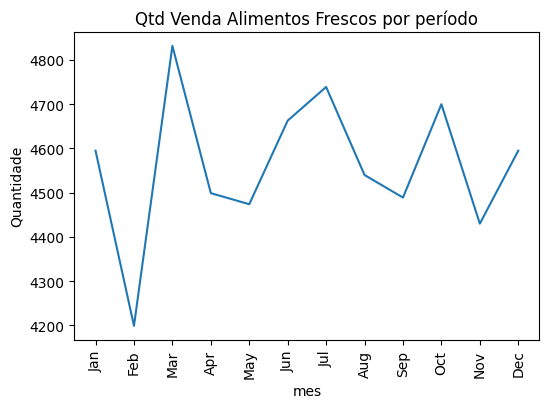

In [78]:
# Plotando o resultado
plt.figure(figsize=(6,4))
sns.lineplot(data=vendas_categoria_AF, x="mes",y="Quantidade")
plt.xticks(rotation = 90)
plt.title("Qtd Venda Alimentos Frescos por período")
plt.show()

In [79]:
vendas_categoria_AF.sort_values(by="Quantidade",ascending=False)

,Categoria,mes_num,mes,Quantidade
2,Alimentos Frescos,3,Mar,4832
6,Alimentos Frescos,7,Jul,4739
9,Alimentos Frescos,10,Oct,4700
5,Alimentos Frescos,6,Jun,4663
0,Alimentos Frescos,1,Jan,4595
11,Alimentos Frescos,12,Dec,4595
7,Alimentos Frescos,8,Aug,4540
3,Alimentos Frescos,4,Apr,4499
8,Alimentos Frescos,9,Sep,4489
4,Alimentos Frescos,5,May,4474


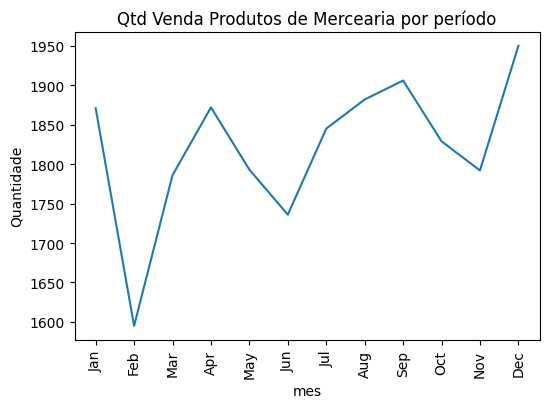

In [80]:
# Plotando o resultado
plt.figure(figsize=(6,4))
sns.lineplot(data=vendas_categoria_PM, x="mes",y="Quantidade")
plt.xticks(rotation = 90)
plt.title("Qtd Venda Produtos de Mercearia por período")
plt.show()

In [81]:
vendas_categoria_PM.sort_values(by="Quantidade",ascending=False)

,Categoria,mes_num,mes,Quantidade
11,Produtos de Mercearia,12,Dec,1950
8,Produtos de Mercearia,9,Sep,1906
7,Produtos de Mercearia,8,Aug,1882
3,Produtos de Mercearia,4,Apr,1872
0,Produtos de Mercearia,1,Jan,1871
6,Produtos de Mercearia,7,Jul,1845
9,Produtos de Mercearia,10,Oct,1829
4,Produtos de Mercearia,5,May,1793
10,Produtos de Mercearia,11,Nov,1792
2,Produtos de Mercearia,3,Mar,1786


Resposta2:

Alimentos Frescos = Março (4832)

Produtos de Mercearia = Dezembro (1950)

# Pergunta 2 - Qual foi o impacto das promoções (descontos aplicados) nas vendas? Quais produtos tiveram o maior aumento nas vendas durante as promoções?

In [82]:
df_vendas.head()

,Data,Produto,Categoria,Preço,Quantidade,Desconto,Total_Venda,Idade,Renda,mes,mes_num
0,2023-01-01,Maçãs,Alimentos Frescos,16.46,10,0.0,164.60,49,2715.61,Jan,1
1,2023-01-01,Bananas,Alimentos Frescos,2.39,4,0.0,9.56,29,2280.15,Jan,1
2,2023-01-01,Laranjas,Alimentos Frescos,8.38,5,0.0,41.90,67,4419.56,Jan,1
3,2023-01-01,Tomates,Alimentos Frescos,2.03,15,0.0,30.45,29,3809.17,Jan,1
4,2023-01-01,Alface,Alimentos Frescos,37.14,14,0.0,519.96,24,1013.42,Jan,1


In [83]:
# Criando máscaras para calcular quantidade de itens vendidos com e sem desconto
vendas_com_desconto = df_vendas["Desconto"] > 0
vendas_sem_desconto = df_vendas["Desconto"] == 0
df_vendas_com_desconto = df_vendas[vendas_com_desconto]
df_vendas_sem_desconto = df_vendas[vendas_sem_desconto]

In [84]:
df_vendas_com_desconto = df_vendas_com_desconto["Quantidade"].sum()

In [85]:
df_vendas_sem_desconto = df_vendas_sem_desconto["Quantidade"].sum()

In [86]:
print(df_vendas_com_desconto)
print(df_vendas_sem_desconto)

41757
159147


Nota-se que vendas sem desconto foram superiores às vendas com desconto

In [87]:
# Localizando linha do dataframe que possui o primeiro desconto
primeiro_desconto = df_vendas[df_vendas["Desconto"] > 0].index[0]
primeiro_desconto

4950

In [88]:
linha_com_primeiro_desconto = df_vendas.loc[primeiro_desconto]
print(linha_com_primeiro_desconto)

Data                  2023-04-01
Produto                    Maçãs
Categoria      Alimentos Frescos
Preço                       19.3
Quantidade                    17
Desconto                    0.18
Total_Venda              269.042
Idade                         42
Renda                    3331.79
mes                          Apr
mes_num                        4
Name: 4950, dtype: object


# Pergunta 3 - Qual a média de vendas diárias por categoria de produto?

In [89]:
# Agrupando por categoria e calculando a média
media_por_categoria = df_vendas.groupby(["Categoria"])["Quantidade"].mean().reset_index().sort_values(by="Quantidade",ascending=False)
media_por_categoria

,Categoria,Quantidade
3,Laticínios e Ovos,10.192877
6,Produtos de Limpeza,10.108493
5,Produtos de Higiene Pessoal,10.067945
0,Alimentos Frescos,10.000913
7,Produtos de Mercearia,9.980365
1,Bebidas,9.975890
8,Utilidades Domésticas,9.952055
4,Pet Shop,9.907397
2,Congelados,9.890959


# Pergunta 5 - Quais as faixas etárias contribuíram mais para as vendas totais?

In [90]:
def classificar_faixa_etaria(idade):
    if 18 <= idade <= 35:
        return 'Jovem'
    elif 36 <= idade <= 59:
        return 'Adulto'
    elif idade >= 60:
        return 'Idoso'
    else:
        return 'Menor de 18'

# Criando função para calcular Faixa Etária com base na coluna "Idade"
df_vendas['Faixa_Etaria'] = df_vendas['Idade'].apply(classificar_faixa_etaria)
df_vendas

,Data,Produto,Categoria,Preço,Quantidade,Desconto,Total_Venda,Idade,Renda,mes,mes_num,Faixa_Etaria
0,2023-01-01,Maçãs,Alimentos Frescos,16.46,10,0.00,164.6000,49,2715.61,Jan,1,Adulto
1,2023-01-01,Bananas,Alimentos Frescos,2.39,4,0.00,9.5600,29,2280.15,Jan,1,Jovem
2,2023-01-01,Laranjas,Alimentos Frescos,8.38,5,0.00,41.9000,67,4419.56,Jan,1,Idoso
3,2023-01-01,Tomates,Alimentos Frescos,2.03,15,0.00,30.4500,29,3809.17,Jan,1,Jovem
4,2023-01-01,Alface,Alimentos Frescos,37.14,14,0.00,519.9600,24,1013.42,Jan,1,Jovem
...,...,...,...,...,...,...,...,...,...,...,...,...
20070,2023-12-31,Produtos de higiene para pets,Pet Shop,26.62,15,0.21,315.4470,39,2475.82,Dec,12,Adulto
20071,2023-12-31,Panelas,Utilidades Domésticas,33.00,19,0.15,532.9500,25,4766.49,Dec,12,Jovem
20072,2023-12-31,Talheres,Utilidades Domésticas,27.60,12,0.29,235.1520,65,3367.68,Dec,12,Idoso
20073,2023-12-31,Copos,Utilidades Domésticas,15.35,13,0.25,149.6625,42,3823.50,Dec,12,Adulto


In [91]:
# Calculando a soma das vendas totais agrupadas por Faixa Etária
vendas_por_faixa_etaria = df_vendas.groupby(["Faixa_Etaria"])["Total_Venda"].sum().reset_index().sort_values(by="Total_Venda", ascending=False)
vendas_por_faixa_etaria["Total_Venda"] = vendas_por_faixa_etaria["Total_Venda"].round(2)
vendas_por_faixa_etaria

,Faixa_Etaria,Total_Venda
0,Adulto,2102041.77
2,Jovem,1537183.38
1,Idoso,1297252.20


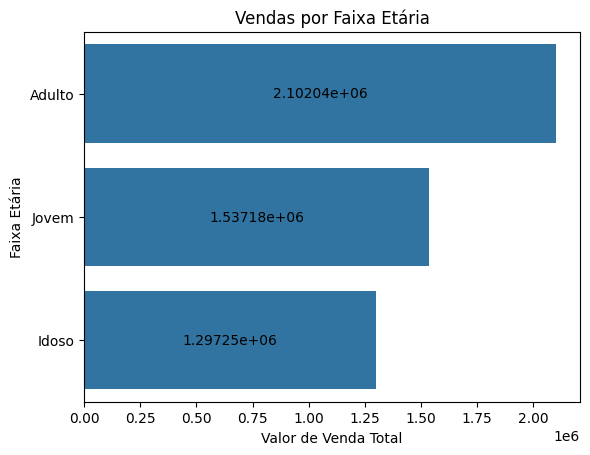

In [92]:
# Plotando o resultado
plt.figure()
ax = sns.barplot(data=vendas_por_faixa_etaria, x = "Total_Venda", y = "Faixa_Etaria",estimator='sum')
ax.bar_label(ax.containers[0], fontsize=10, label_type="center");
plt.title("Vendas por Faixa Etária")
plt.ylabel("Faixa Etária")
plt.xlabel("Valor de Venda Total")
plt.show()

Resposta: Adultos e Jovens

# Pergunta 8 - Qual é o ticket médio (valor médio das vendas) por faixa etária e como ele varia entre diferentes categorias de produto?

In [93]:
# Calculando a média das vendas agrupadas por Faixa Etária
media_vendas_por_faixa_etaria = df_vendas.groupby(["Faixa_Etaria"])["Total_Venda"].mean().reset_index().sort_values(by="Total_Venda", ascending=False)
media_vendas_por_faixa_etaria["Total_Venda"] = media_vendas_por_faixa_etaria["Total_Venda"].round(2)
media_vendas_por_faixa_etaria

,Faixa_Etaria,Total_Venda
0,Adulto,247.79
1,Idoso,247.33
2,Jovem,242.19


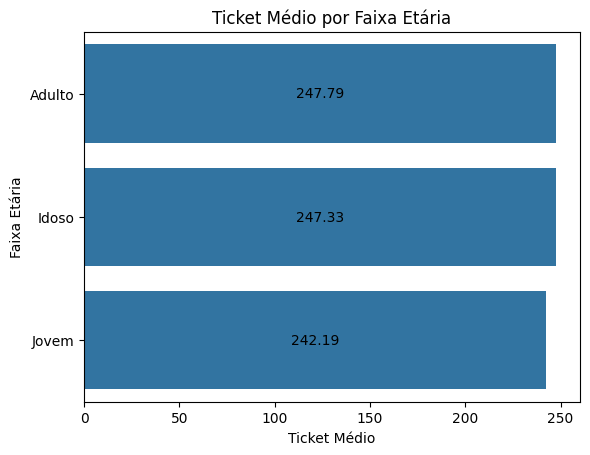

In [94]:
# Plotando o resultado
plt.figure()
ax = sns.barplot(data=media_vendas_por_faixa_etaria, x = "Total_Venda", y = "Faixa_Etaria",estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10, label_type="center");
plt.title("Ticket Médio por Faixa Etária")
plt.ylabel("Faixa Etária")
plt.xlabel("Ticket Médio")
plt.show()

In [95]:
# Calculando a média das vendas agrupadas por Categoria
ticket_medio_por_categoria = df_vendas.groupby(["Categoria"])["Total_Venda"].mean().reset_index().sort_values(by="Total_Venda", ascending=False)
ticket_medio_por_categoria["Total_Venda"] = ticket_medio_por_categoria["Total_Venda"].round(2)
ticket_medio_por_categoria

,Categoria,Total_Venda
3,Laticínios e Ovos,252.03
0,Alimentos Frescos,249.37
1,Bebidas,248.98
8,Utilidades Domésticas,246.25
6,Produtos de Limpeza,245.23
7,Produtos de Mercearia,241.85
4,Pet Shop,241.28
5,Produtos de Higiene Pessoal,241.12
2,Congelados,240.94


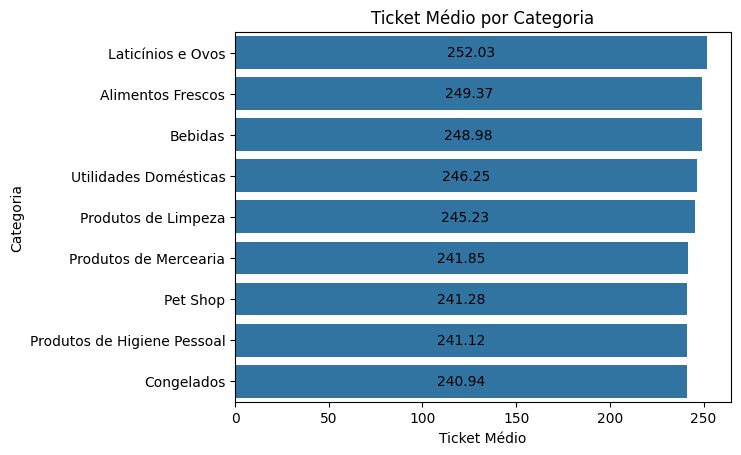

In [96]:
# Plotando o resultado
plt.figure()
ax = sns.barplot(data=ticket_medio_por_categoria, x = "Total_Venda", y = "Categoria",estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10, label_type="center");
plt.title("Ticket Médio por Categoria")
plt.ylabel("Categoria")
plt.xlabel("Ticket Médio")
plt.show()

Resposta: Ticket médio varia pouco entre as faixas etárias, sendo muito similar entre adultos e idosos e um pouco menos em jovens

# Pergunta 9 - Qual é a relação entre a idade dos clientes e o valor total das compras?

In [97]:
# Calculando a média das vendas agrupadas por Categoria
total_venda_por_idade = df_vendas.groupby(["Idade"])["Total_Venda"].sum().reset_index().sort_values(by="Total_Venda", ascending=False)
total_venda_por_idade["Total_Venda"] = total_venda_por_idade["Total_Venda"].round(2)
total_venda_por_idade

,Idade,Total_Venda
34,52,105645.73
49,67,99574.38
32,50,98013.24
42,60,94348.00
22,40,94125.85
2,20,94002.97
19,37,93843.73
51,69,93653.13
10,28,93376.82
35,53,92388.04


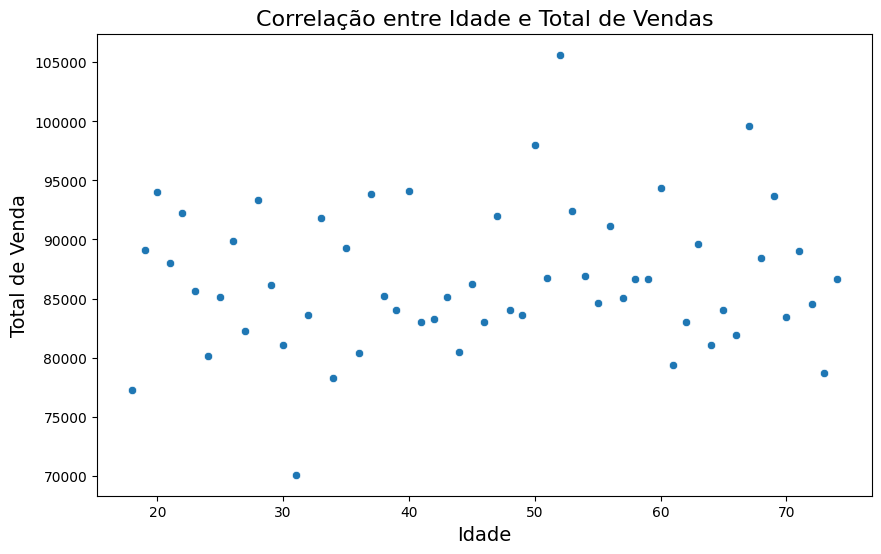

In [98]:
# Criando o gráfico de correlação entre Idade e Total_Venda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Idade', y='Total_Venda', data=total_venda_por_idade)

# Adicionando título e rótulos aos eixos
plt.title('Correlação entre Idade e Total de Vendas', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Total de Venda', fontsize=14)

# Exibindo o gráfico
plt.show()


In [99]:
# Criando uma tabela com as colunas Idade e Total_Venda
tabela_correlacao = total_venda_por_idade[["Idade", "Total_Venda"]]

# Calculando a correlação
correlacao = tabela_correlacao.corr()

# Exibindo a tabela de correlação
print(correlacao)


                Idade  Total_Venda
Idade        1.000000     0.087462
Total_Venda  0.087462     1.000000


Resposta: Observa-se pelo gráfico de dispersão e tabela de correlação que possui baixa relação entre idade e valor total de venda